<a href="https://colab.research.google.com/github/jcdumlao14/Data-Science-Internship-Program-SKS/blob/main/Task_2_Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2: Exploratory Data Analysis (EDA)
## Description:
Calculate and visually represent the overall churn rate. Explore customer distribution by gender, partner status, and dependent status. Analyze tenure distribution and its relation with churn. Investigate how churn varies across different contract types and payment methods.
## Skills:
- Data visualization,statistical analysis
- Exploratory data analysis
- Understanding of customer demographic variables
- Churn rate calculation


# Setting Up
- **Import Libraries:** The code starts by bringing in tools (libraries) that will be used. Think of it like gathering the right tools for a job.
  - `pandas`: For working with data in tables (like spreadsheets).
  - `numpy`: For doing math stuff, especially with numbers in arrays.
  - `matplotlib.pyplot`: For making charts and graphs.
  - `seaborn`: Another library for making prettier and more informative charts.

- **Set a styling:** Sets the style to fivethirtyeight


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind, f_oneway

# Set a styling
plt.style.use('fivethirtyeight')

## Warnings
import warnings
warnings.filterwarnings('ignore')

# Load the Data

In [ ]:
# Load the dataset
df = pd.read_csv("/content/Telco_Customer_Churn_Dataset  (3).csv")


In [ ]:
# Display the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Cleaning and Preprocessing

Before starting EDA, it's crucial to clean and preprocess the data. This involves handling missing values, converting data types, and addressing any inconsistencies.

- **Dealing with Messy Data**: Real-world data is often imperfect. This section cleans it up.
- **TotalCharges to Numbers**: The TotalCharges column is changed to be numbers. If any values can't be converted (like if they have letters), they're replaced with "NaN" (which means "Not a Number," a type of missing data).
- **Handle missing values**: It replaces the NaN value from TotalCharges with 0.
-**Yes/No to 1/0**: Columns with "Yes" and "No" answers (like Partner, Dependents, etc.) are converted to 1s and 0s. This makes it easier for the computer to work with.
- **Gender to 1/0**: The gender column is mapped to 1 and 0 to male and female.


In [ ]:
# Convert TotalCharges to numeric, handling errors by converting invalid entries to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [ ]:
# Handle missing values (NaN) - replace with 0 or the mean/median
df['TotalCharges'] = df['TotalCharges'].fillna(0)


In [ ]:
# Convert binary categorical features to numerical
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [ ]:
# Convert gender to numerical
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Overall Churn Rate Calculation and Visualization

- **What's the Churn Rate?** This calculates the percentage of customers who left (churned).
- **Visualize**: It then creates a bar chart to show this churn rate visually.


Churn Rate:
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


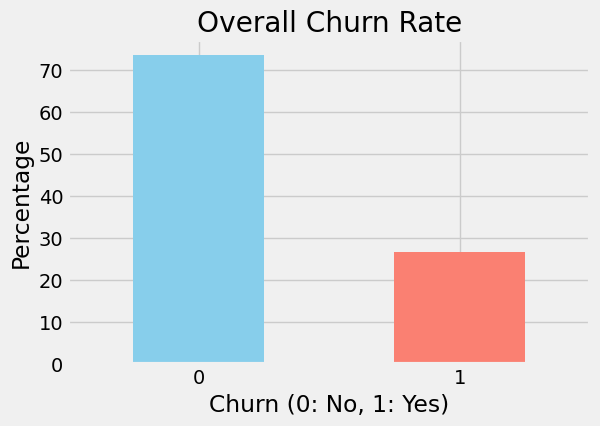

In [ ]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(f"Churn Rate:\n{churn_rate}")

# Visualization
plt.figure(figsize=(6, 4))
churn_rate.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Overall Churn Rate')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


#  Analyzing Customer Groups (Demographics)
- **Looking at Gender, Partners, Dependents**: This section explores how many customers fall into different categories (male/female, have a partner/don't, have dependents/don't).
- **Bar and Pie Charts**: For each category, it creates a bar chart and a pie chart. The bar chart shows the number of customers in each group. The pie chart shows the percentage of customers in each group.



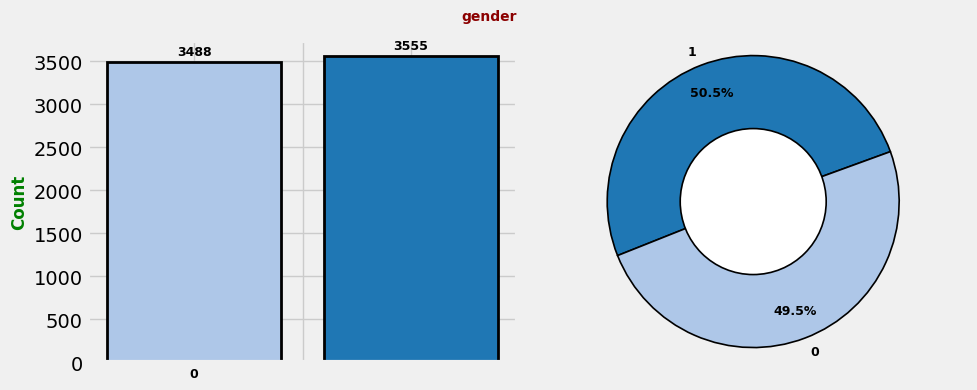

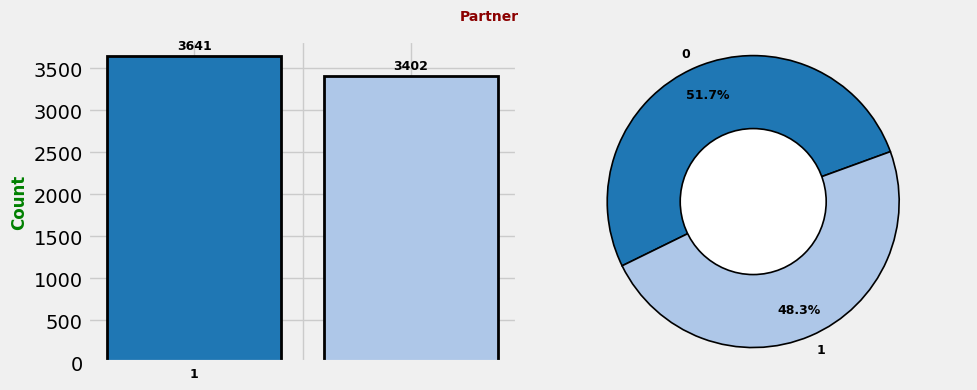

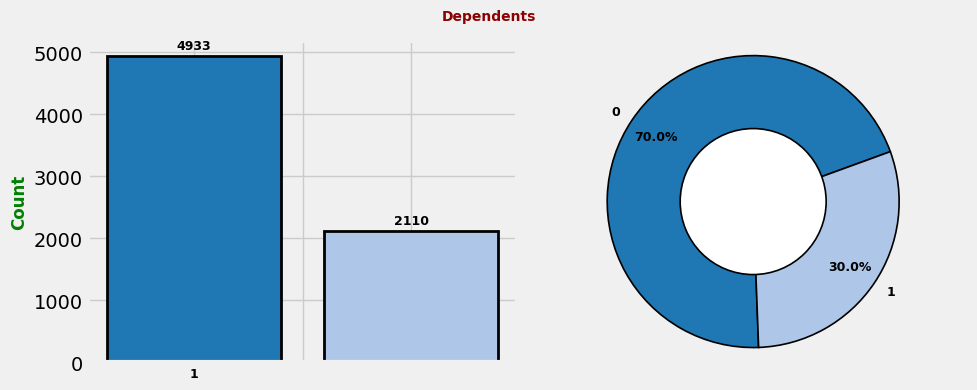

In [ ]:
categorical_cols = ['gender', 'Partner', 'Dependents'] # changed variables here
for cat_cols in categorical_cols:
    fig,ax = plt.subplots(1,2,figsize=(10,4))

    # 1. We create our dataframe that contains our data to be displayed.
    df_plot_moment = df[cat_cols].value_counts().to_frame()

    # 2. We generate the values of our graphs.
    values = df_plot_moment.iloc[:,0]
    # 3. We generate the labels for our charts.
    labels = df_plot_moment.index.to_list()
    # 4. We generate the color map.
    cmap = plt.get_cmap('tab20')
    colors = cmap(np.arange(len(labels)))


    # 2. Bar chart.
    rects = ax[0].bar(labels, values, color = colors,
                      edgecolor = 'black', linewidth = 2.0)

    ax[0].set_ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'green')
    ax[0].set_xticklabels(labels, fontsize = 9, fontweight = 'bold')

    # function to label our bars.
    def autolabel(rects):
      for rect in rects:
        height = rect.get_height()
        ax[0].annotate(text = '{}'.format(height),
                    xy = (rect.get_x() + rect.get_width()/2., height-0.005),
                    xytext = (0,3),
                    textcoords = 'offset points',
                    va = 'bottom',
                    ha = 'center',
                    weight = 'bold',
                    size = 9,
                    color = 'black')

    autolabel(rects) # we label our bars.

    # Pie chart
    # explosion
    explode = [0] * len(labels)  # Create explode list with the same length as labels and values

    ax[1].pie(x = values, labels = labels , startangle = 20,
              autopct = '%.1f%%', colors = colors, wedgeprops={'linewidth':1.2,'edgecolor':'black'},
              textprops = {'color':'black', 'weight':'bold','fontsize':9}, explode = explode, pctdistance = 0.8)

    # draw circle
    centre_circle = plt.Circle((0, 0), 0.50, fc='white', edgecolor = 'black', linewidth = 1.2)
    fig = plt.gcf()

    # Adding Circle in Pie chart
    fig.gca().add_artist(centre_circle)
    ax[1].axis('equal')

    fig.suptitle(f"{cat_cols}", fontsize = 10, fontweight = 'bold', color = 'darkred')

    fig.tight_layout()
    fig.subplots_adjust(top = 0.9)
    plt.show()



# Tenure and Churn
- **Tenure**: Tenure is how long a customer has been with the company (usually in months).
- **Tenure vs. Churn**: This creates a histogram showing how long customers stayed, split by whether they churned or not. This helps to see if customers who leave tend to have shorter or longer tenures.


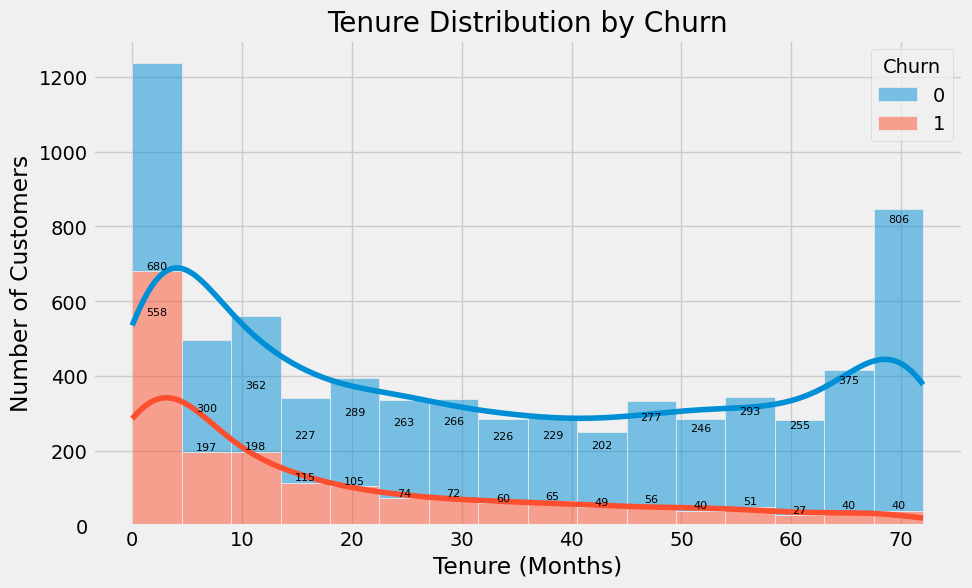

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x='tenure', hue='Churn', kde=True, multiple="stack")
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')

# Add value labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height): #check for nan
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=8)

plt.show()

# Contract and Payment Method vs. Churn
- **Contract Type**: Explores if certain contract types lead to more churn
- Payment Method: See if churn is related to payment method


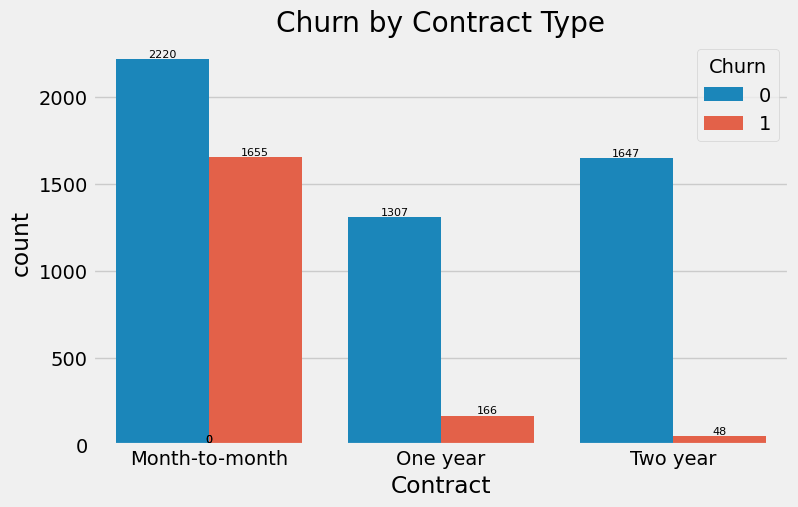

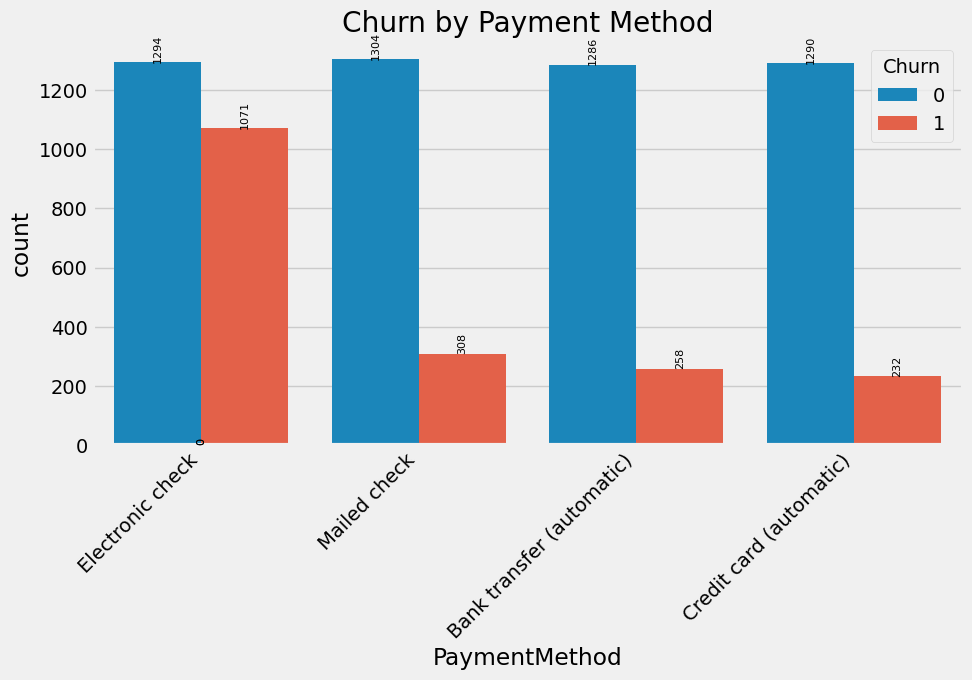

In [ ]:
# Contract Type vs Churn
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')

# Add value labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=8)
plt.show()

# Payment Method vs Churn
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Churn by Payment Method')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=8, rotation=90)  # Rotate labels if needed

plt.show()


# Relationships Between Numbers (Pair Plot)
- **Pair Plot**: Creates a grid of charts showing the relationships between tenure, monthly charges, and total charges. The color of the points shows whether the customer churned or not. This can reveal patterns, like whether customers with high monthly charges are more likely to churn.


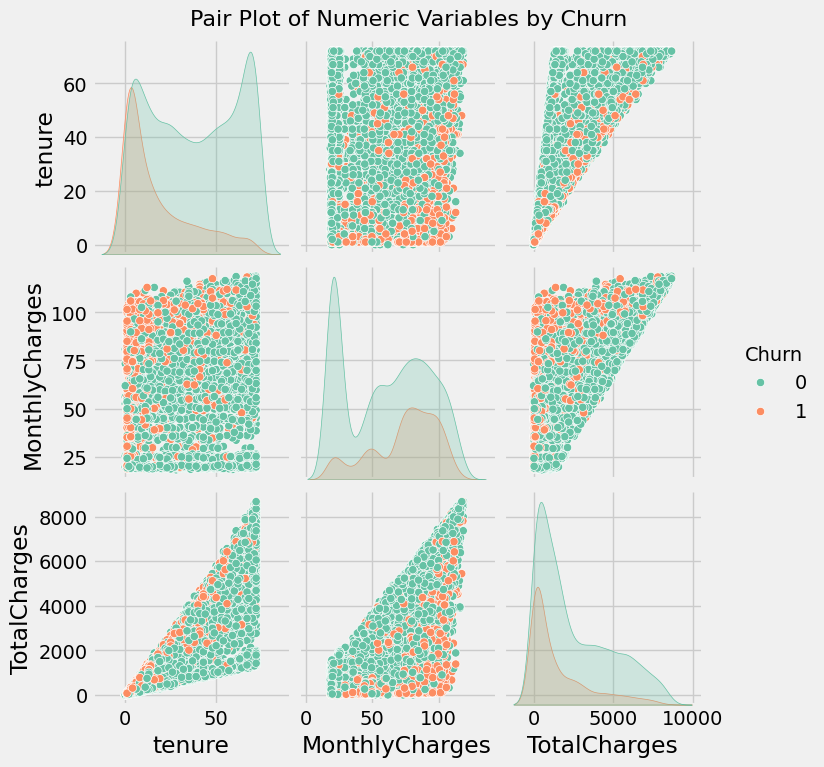

In [ ]:
# Using pairplot for Numerical Features

numeric_variables = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Changed variables here
# Create Pair Plot
sns.pairplot(df, vars=numeric_variables, hue='Churn', palette='Set2', diag_kind='kde', height=2.5)
plt.suptitle('Pair Plot of Numeric Variables by Churn', y=1.02, fontsize=16)
plt.show()

# Creating New Features (Feature Engineering)
- **Making More Useful Data:** Sometimes, you can get more insights by combining existing data to create new features.
- **Tenure in Years:** Converts tenure from months to years.
- **Average Monthly Charge:** Calculates the average amount a customer pays each month (total charges divided by tenure). Handles cases where tenure is zero to avoid errors.
- **Multiple Services:** Counts how many internet services a customer has (Online Security, Backup, etc.). This combines several columns into one. The code treats 'No internet service' as the same as 'No' for these services.
- **Automatic Payment:** Flags customers who use automatic payment methods.

In [ ]:
# Feature Engineering

# Tenure in Years:
df['TenureYears'] = df['tenure'] / 12

# Average Monthly Charge (if TotalCharges is meaningful)
df['AvgMonthlyCharge'] = df['TotalCharges'] / df['tenure']
df['AvgMonthlyCharge'] = df['AvgMonthlyCharge'].replace([np.inf, -np.inf], 0)  # Handle division by zero

# Has Multiple Services: Combine multiple "Yes/No/No internet service" columns.
internet_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in internet_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'No internet service': 0})  # Treat "No internet service" as 0
df['MultipleServices'] = df[internet_cols].sum(axis=1)  # Sum the binary indicators

# Combine automatic payment methods
df['IsAutomaticPayment'] = df['PaymentMethod'].apply(lambda x: 1 if 'automatic' in x else 0)


# Statistical Analysis
- **Chi-Squared Tests (Categorical Features):** This set of tests are designed to understand whether there is an assocation or relationship between categorical features (e.g., gender, partner, contract type) and the churn target variable.
  - First, a contingency table is created showing the number of customers who churned vs. didn't churn for each category of the feature (e.g. number of men who churned vs. number of men who didn't).
  - Then, the chi2_contingency function is used to compute the chi-squared statistic and the associated p-value. The p-value indicates the probability of observing the results (or more extreme) if there were no association between the variables.
  - The tests print the chi-squared statistic and p-value. If the p-value is less than 0.05, it suggests a statistically significant association.


- **T-tests or ANOVA (Numeric Features):** Similar to the chi-squared tests, the tests look for associations between numeric features (e.g., tenure, monthly charges) and the churn outcome.
  - First, the code splits the customer data into two groups, churned and didn't churn.
The code then checks if the feature looks roughly continuous or more like discrete categories. If roughly continuous (more than 5 unique values), it performs a T-test. If more like discrete categories (though it is better to treat them as categorical), it performs an ANOVA test.
  - T-tests and ANOVA tests compare the means of the numeric feature between the churned and non-churned groups. The p-value assesses the likelihood of observing the difference in means (or more extreme) if there were truly no difference.
  - Similar to the chi-squared tests, if the p-value is less than 0.05, it indicates a statistically significant difference in the mean of the feature between churned and non-churned customers.



In [ ]:
# Statistical Analysis

# Chi-squared Tests (Categorical Features)

categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'IsAutomaticPayment']
print("\nChi-Squared Tests:")
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"\nFeature: {feature}")
    print(f"  Chi2 Statistic: {chi2:.4f}")
    print(f"  P-value: {p:.4f}")
    if p < 0.05:
        print("  ==> Statistically significant association with Churn")
    else:
        print("  ==> No statistically significant association with Churn")



Chi-Squared Tests:

Feature: gender
  Chi2 Statistic: 0.4841
  P-value: 0.4866
  ==> No statistically significant association with Churn

Feature: SeniorCitizen
  Chi2 Statistic: 159.4263
  P-value: 0.0000
  ==> Statistically significant association with Churn

Feature: Partner
  Chi2 Statistic: 158.7334
  P-value: 0.0000
  ==> Statistically significant association with Churn

Feature: Dependents
  Chi2 Statistic: 189.1292
  P-value: 0.0000
  ==> Statistically significant association with Churn

Feature: PhoneService
  Chi2 Statistic: 0.9150
  P-value: 0.3388
  ==> No statistically significant association with Churn

Feature: Contract
  Chi2 Statistic: 1184.5966
  P-value: 0.0000
  ==> Statistically significant association with Churn

Feature: PaperlessBilling
  Chi2 Statistic: 258.2776
  P-value: 0.0000
  ==> Statistically significant association with Churn

Feature: PaymentMethod
  Chi2 Statistic: 648.1423
  P-value: 0.0000
  ==> Statistically significant association with Churn

Fea

In [ ]:
# T-tests or ANOVA (Numeric Features)

numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TenureYears', 'AvgMonthlyCharge', 'MultipleServices']
print("\nT-tests/ANOVA:")
for feature in numeric_features:
    churn_group = df[df['Churn'] == 1][feature]
    no_churn_group = df[df['Churn'] == 0][feature]

    if len(df[feature].unique()) > 5:  # T-test if data looks roughly continuous
        t_stat, p_val = ttest_ind(churn_group, no_churn_group, equal_var=False)  # Welch's t-test (unequal variances)
        print(f"\nFeature: {feature} (T-test)")
        print(f"  T-statistic: {t_stat:.4f}")
        print(f"  P-value: {p_val:.4f}")
        if p_val < 0.05:
            print("  ==> Statistically significant difference between churned and non-churned customers")
        else:
            print("  ==> No statistically significant difference")
    else:  # ANOVA if more like discrete categories (though it's generally better to treat them as categorical)
        f_stat, p_val = f_oneway(churn_group, no_churn_group)
        print(f"\nFeature: {feature} (ANOVA)")
        print(f"  F-statistic: {f_stat:.4f}")
        print(f"  P-value: {p_val:.4f}")
        if p_val < 0.05:
            print("  ==> Statistically significant difference between churned and non-churned customers")
        else:
            print("  ==> No statistically significant difference")


T-tests/ANOVA:

Feature: tenure (T-test)
  T-statistic: -34.8238
  P-value: 0.0000
  ==> Statistically significant difference between churned and non-churned customers

Feature: MonthlyCharges (T-test)
  T-statistic: 18.4075
  P-value: 0.0000
  ==> Statistically significant difference between churned and non-churned customers

Feature: TotalCharges (T-test)
  T-statistic: -18.7066
  P-value: 0.0000
  ==> Statistically significant difference between churned and non-churned customers

Feature: TenureYears (T-test)
  T-statistic: -34.8238
  P-value: 0.0000
  ==> Statistically significant difference between churned and non-churned customers

Feature: AvgMonthlyCharge (T-test)
  T-statistic: nan
  P-value: nan
  ==> No statistically significant difference

Feature: MultipleServices (ANOVA)
  F-statistic: nan
  P-value: nan
  ==> No statistically significant difference


# Demographic Understanding
- **Looking Deeper at Customer Groups:** This section focuses on how demographics (like gender, age, marital status) relate to churn.
- **Churn Rate by Group:** It calculates the churn rate (percentage of churned customers) for each gender, senior citizen status, partner status, and dependent status.

In [ ]:
# Gender and Churn:
gender_churn = df.groupby('gender')['Churn'].value_counts(normalize=True) * 100
print("\nChurn Rate by Gender:\n", gender_churn)



Churn Rate by Gender:
 gender  Churn
0       0        73.079128
        1        26.920872
1       0        73.839662
        1        26.160338
Name: proportion, dtype: float64


In [ ]:
# Senior Citizen and Churn:
senior_churn = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True) * 100
print("\nChurn Rate by Senior Citizen Status:\n", senior_churn)



Churn Rate by Senior Citizen Status:
 SeniorCitizen  Churn
0              0        76.393832
               1        23.606168
1              0        58.318739
               1        41.681261
Name: proportion, dtype: float64


In [ ]:
# Partner/Dependents and Churn:
partner_churn = df.groupby('Partner')['Churn'].value_counts(normalize=True) * 100
dependents_churn = df.groupby('Dependents')['Churn'].value_counts(normalize=True) * 100
print("\nChurn Rate by Partner Status:\n", partner_churn)
print("\nChurn Rate by Dependents Status:\n", dependents_churn)



Churn Rate by Partner Status:
 Partner  Churn
0        0        67.042021
         1        32.957979
1        0        80.335097
         1        19.664903
Name: proportion, dtype: float64

Churn Rate by Dependents Status:
 Dependents  Churn
0           0        68.720860
            1        31.279140
1           0        84.549763
            1        15.450237
Name: proportion, dtype: float64
